In [42]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#reading the data
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False,parse_dates=['Created Date', 'Closed Date'])
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
data.replace('Unspecified',np.nan,inplace=True)
data.sort_values("City", axis = 0, ascending = True, 
				inplace = True, na_position ='last')
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,07-11-15 8:25,The Police Department issued a summons in resp...,07-11-15 1:39,14 QUEENS,QUEENS,1042488.0,154292.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)"
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,BEACH 63 STREET,ALMEDA AVENUE,DE COSTA AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,11/25/2015 12:46:24 AM,The Police Department responded to the complai...,11/24/2015 06:07:11 PM,14 QUEENS,QUEENS,1041791.0,157078.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)"
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,04-06-15 8:10,The Police Department issued a summons in resp...,04-06-15 0:44,14 QUEENS,QUEENS,1042486.0,154395.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)"
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,BEACH 74 STREET,BEACH CHANNEL DRIVE,AMSTEL BOULEVARD,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,05/20/2015 02:21:47 PM,The Police Department responded to the complai...,05/20/2015 07:29:18 AM,14 QUEENS,QUEENS,1039157.0,154726.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)"
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,BEACH 56 STREET,ARVERNE BOULEVARD,BEACH CHANNEL DRIVE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,09/25/2015 04:12:27 PM,The Police Department responded to the complai...,09/25/2015 09:20:18 AM,14 QUEENS,QUEENS,1043649.0,155604.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)"


In [7]:
data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [8]:
#grouping the complaint type by city
data_complaints = data.groupby('Complaint Type').City.count()
data_complaints

Complaint Type
Agency Issues                    0
Animal Abuse                  7767
Animal in a Park                 1
Bike/Roller/Skate Chronic      422
Blocked Driveway             76761
Derelict Vehicle             17547
Disorderly Youth               286
Drinking                      1272
Ferry Complaint                  0
Graffiti                       113
Homeless Encampment           4415
Illegal Fireworks              168
Illegal Parking              74318
Noise - Commercial           35200
Noise - House of Worship       929
Noise - Park                  4016
Noise - Street/Sidewalk      48000
Noise - Vehicle              17029
Panhandling                    305
Posting Advertisement          649
Squeegee                         4
Traffic                       4495
Urinating in Public            592
Vending                       3795
Name: City, dtype: int64

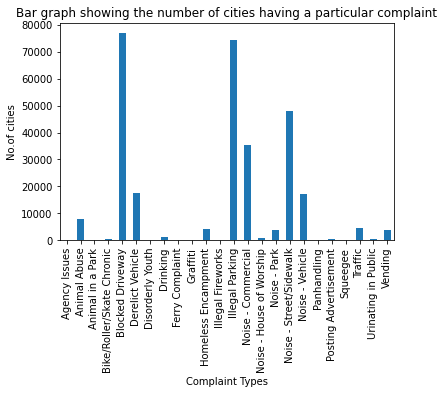

In [9]:
x=data.groupby('Complaint Type').City.count()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("No.of cities")
plt.title("Bar graph showing the number of cities having a particular complaint")
plt.show()

In [10]:
#creating request closing time column
data["Request_Closing_Time"] = data["Closed Date"] - data["Created Date"]
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,07-11-15 8:25,The Police Department issued a summons in resp...,07-11-15 1:39,14 QUEENS,QUEENS,1042488.0,154292.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,BEACH 63 STREET,ALMEDA AVENUE,DE COSTA AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,11/25/2015 12:46:24 AM,The Police Department responded to the complai...,11/24/2015 06:07:11 PM,14 QUEENS,QUEENS,1041791.0,157078.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,04-06-15 8:10,The Police Department issued a summons in resp...,04-06-15 0:44,14 QUEENS,QUEENS,1042486.0,154395.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,BEACH 74 STREET,BEACH CHANNEL DRIVE,AMSTEL BOULEVARD,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,05/20/2015 02:21:47 PM,The Police Department responded to the complai...,05/20/2015 07:29:18 AM,14 QUEENS,QUEENS,1039157.0,154726.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,BEACH 56 STREET,ARVERNE BOULEVARD,BEACH CHANNEL DRIVE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,09/25/2015 04:12:27 PM,The Police Department responded to the complai...,09/25/2015 09:20:18 AM,14 QUEENS,QUEENS,1043649.0,155604.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51


In [ ]:
data["Request_Closing_Time"].isnull().sum()

1406

In [ ]:
data['Request_Closing_Time'].dropna()

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
188418   00:05:00
188419   01:12:00
188420   00:50:00
188421   05:59:00
188422   08:53:00
Name: Request_Closing_Time, Length: 187017, dtype: timedelta64[ns]

In [ ]:
data.sort_values("Request_Closing_Time", axis = 0, ascending = True, 
				inplace = True, na_position ='last')
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
61125,31882332,2015-11-01 01:41:00,2015-11-01 01:42:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003.0,78 EAST 4 STREET,EAST 4 STREET,BOWERY,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,11-01-15 9:41,The Police Department responded to the complai...,11-01-15 1:42,03 MANHATTAN,MANHATTAN,987021.0,203932.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726422,-73.990003,"(40.726422494913116, -73.9900025591503)",00:01:00
163683,31212389,2015-08-01 14:33:00,2015-08-01 14:35:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11206.0,88 MOORE STREET,MOORE STREET,GRAHAM AVENUE,HUMBOLDT STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08-01-15 22:33,The Police Department responded to the complai...,08-01-15 14:35,01 BROOKLYN,BROOKLYN,1000345.0,195700.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.703813,-73.941951,"(40.703813419626954, -73.94195083019125)",00:02:00
60357,31890750,2015-11-01 20:16:00,2015-11-01 20:18:00,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,177 LAREDO AVENUE,LAREDO AVENUE,POMPEY AVENUE,ANNADALE ROAD,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,11-02-15 4:16,The Police Department responded to the complai...,11-01-15 20:18,03 STATEN ISLAND,STATEN ISLAND,935996.0,139374.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.549094,-74.173633,"(40.549093797686275, -74.17363282481907)",00:02:00
42256,32015343,2015-11-18 23:17:34,2015-11-18 23:20:00,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,177 LAREDO AVENUE,LAREDO AVENUE,POMPEY AVENUE,ANNADALE ROAD,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,11/19/2015 07:17:34 AM,The Police Department responded to the complai...,11/18/2015 11:20:00 PM,03 STATEN ISLAND,STATEN ISLAND,935996.0,139374.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.549094,-74.173633,"(40.549093797686275, -74.17363282481907)",00:02:26
45312,31992058,2015-11-15 23:10:49,2015-11-15 23:13:19,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,545 ANNADALE ROAD,ANNADALE ROAD,WOLCOTT AVENUE,LAREDO AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,11/16/2015 07:10:49 AM,The Police Department responded to the complai...,11/15/2015 11:13:19 PM,03 STATEN ISLAND,STATEN ISLAND,935699.0,139413.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.549199,-74.174702,"(40.54919922420646, -74.174

In [ ]:
data_complaints = data.groupby('Complaint Type').City.count()
data_complaints

Complaint Type
Agency Issues                    0
Animal Abuse                  4839
Bike/Roller/Skate Chronic      263
Blocked Driveway             50322
Derelict Vehicle             10984
Disorderly Youth               118
Drinking                       805
Ferry Complaint                  0
Graffiti                        61
Homeless Encampment           2925
Illegal Fireworks               39
Illegal Parking              47776
Noise - Commercial           21116
Noise - House of Worship       535
Noise - Park                  2490
Noise - Street/Sidewalk      28505
Noise - Vehicle               9978
Panhandling                    205
Posting Advertisement          603
Traffic                       2616
Urinating in Public            386
Vending                       2192
Name: City, dtype: int64

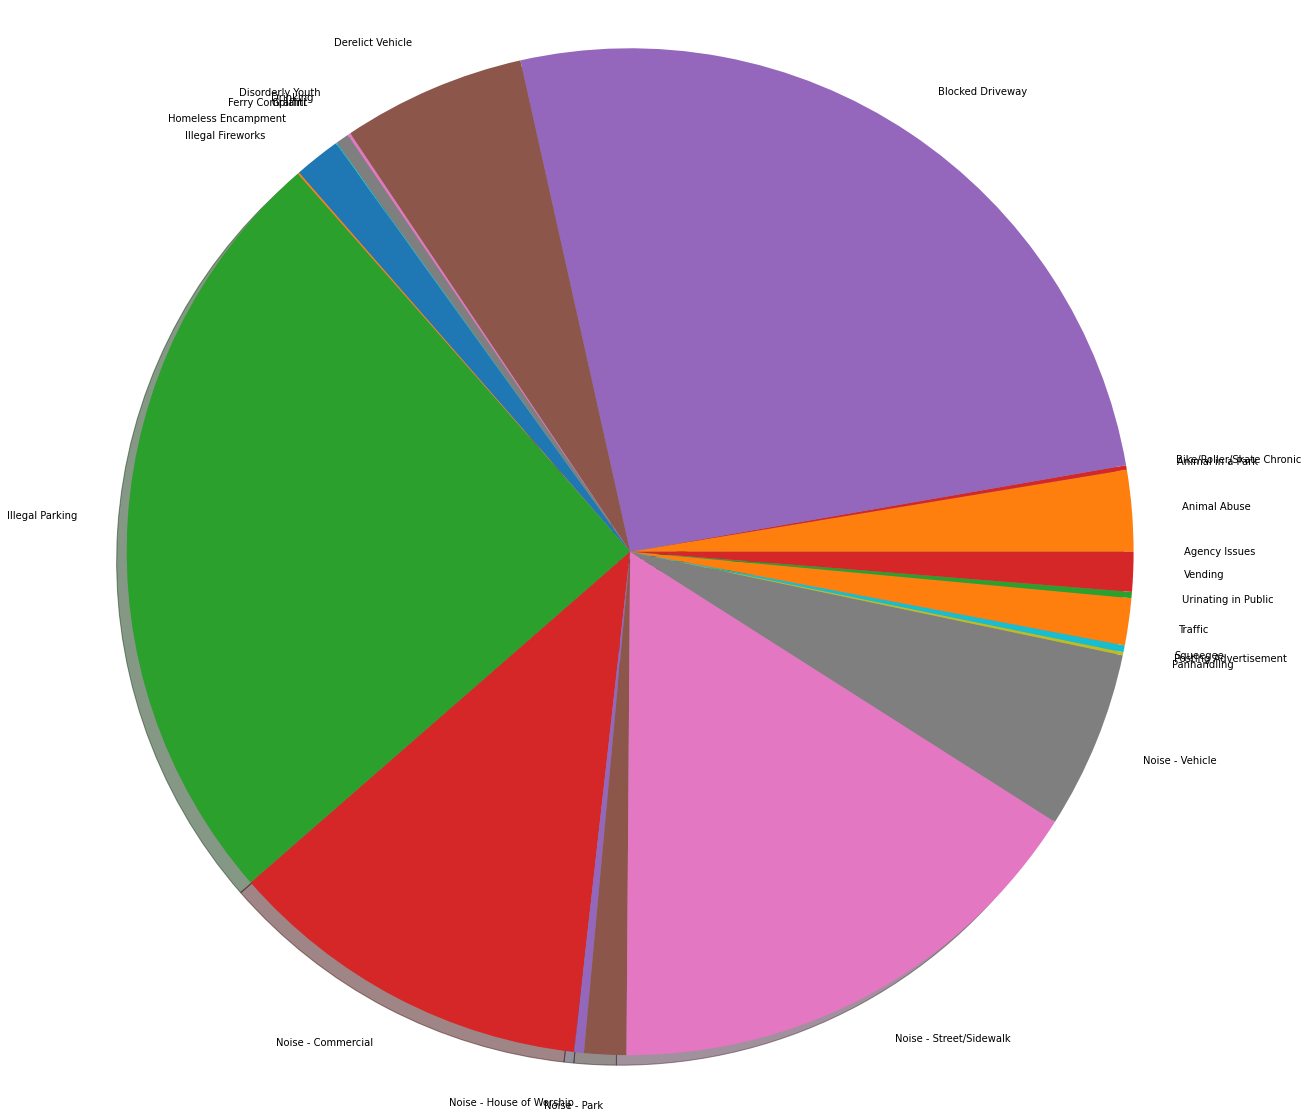

In [26]:
#pie chart for complaint types grouped by city
plt.figure(figsize=(20,20))
labels = x.keys()
sizes = x
plt.pie(sizes,labels=labels,shadow=True) 
plt.axis('equal')
plt.show()

In [ ]:
data_complaints_closing_time = data.groupby('Request_Closing_Time').City.count()
data_complaints_closing_time

Request_Closing_Time
0 days 00:01:00     1
0 days 00:02:00     2
0 days 00:02:26     1
0 days 00:02:30     1
0 days 00:02:34     1
                   ..
8 days 08:39:06     1
9 days 07:21:06     1
9 days 07:22:12     1
21 days 15:16:01    1
24 days 01:21:36    1
Name: City, Length: 41764, dtype: int64

In [12]:
data['Request_Closing_Time'].mean()

Timedelta('0 days 04:18:51.832782')

In [17]:
import datetime
data['Request_Closing_Time'].groupby(data['City']) 
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,07-11-15 8:25,The Police Department issued a summons in resp...,07-11-15 1:39,14 QUEENS,QUEENS,1042488.0,154292.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,BEACH 63 STREET,ALMEDA AVENUE,DE COSTA AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,11/25/2015 12:46:24 AM,The Police Department responded to the complai...,11/24/2015 06:07:11 PM,14 QUEENS,QUEENS,1041791.0,157078.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,BEACH 61 STREET,BEACH FRONT ROAD,LARKIN AVENUE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,04-06-15 8:10,The Police Department issued a summons in resp...,04-06-15 0:44,14 QUEENS,QUEENS,1042486.0,154395.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,BEACH 74 STREET,BEACH CHANNEL DRIVE,AMSTEL BOULEVARD,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,05/20/2015 02:21:47 PM,The Police Department responded to the complai...,05/20/2015 07:29:18 AM,14 QUEENS,QUEENS,1039157.0,154726.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,BEACH 56 STREET,ARVERNE BOULEVARD,BEACH CHANNEL DRIVE,NaN,NaN,ADDRESS,ARVERNE,NaN,Precinct,Closed,09/25/2015 04:12:27 PM,The Police Department responded to the complai...,09/25/2015 09:20:18 AM,14 QUEENS,QUEENS,1043649.0,155604.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51


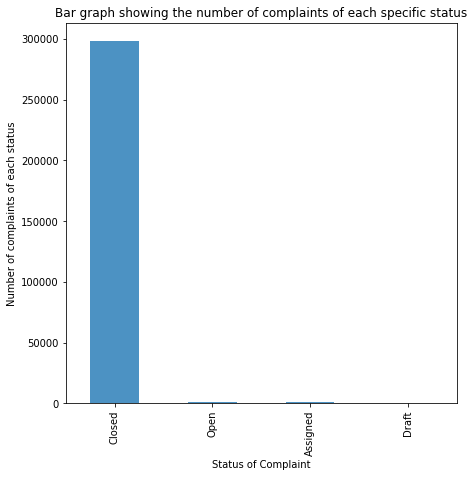

In [19]:
#plot showing status of the requests
data['Status'].value_counts().plot(kind='bar',alpha=0.8,figsize=(7,7))
plt.xlabel("Status of Complaint")
plt.ylabel("Number of complaints of each status")
plt.title("Bar graph showing the number of complaints of each specific status")
plt.show()

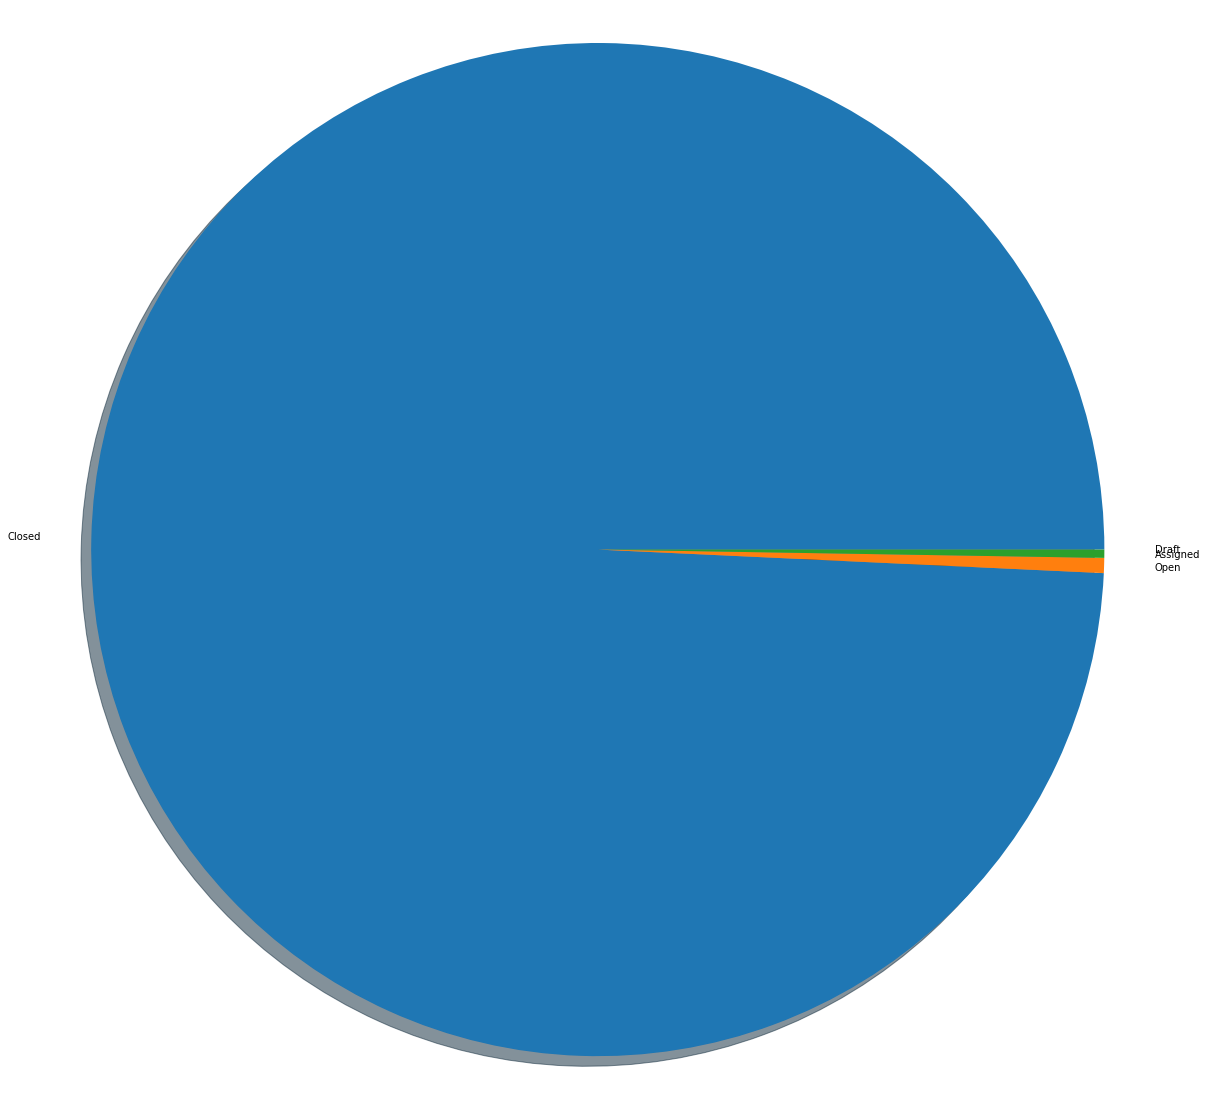

In [21]:

status_complaint = data['Status'].value_counts()

# # Pie chart of Different compalints.
plt.figure(figsize=(20,20))
labels = status_complaint.keys()
sizes = status_complaint
plt.pie(sizes,labels=labels,shadow=True) 
plt.axis('equal')
plt.show()



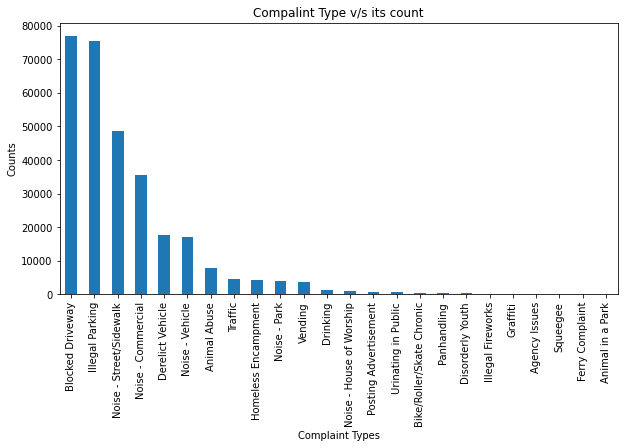

In [30]:
#Bar graph to show the compalint type and its count
plt.figure(figsize=(10,5))
x=data['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("Counts")
plt.title("Compalint Type v/s its count")
plt.show()

In [35]:
#Find the top 3 complaint types
x=data['Complaint Type'].value_counts()
print(x.head(3))

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Name: Complaint Type, dtype: int64


In [36]:
#Find the least 3 complaint types
x=data['Complaint Type'].value_counts()
print(x.tail(3))

Squeegee            4
Ferry Complaint     2
Animal in a Park    1
Name: Complaint Type, dtype: int64
